<a href="https://colab.research.google.com/github/WelfLowe/RLAgents/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [4]:
housing_data = fetch_california_housing()

# Convert the data into a pandas DataFrame
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Target'] = housing_data.target
print(df.columns)

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')


1. HouseAge: Median house age in the block.
1. AveRooms: Average number of rooms per household.
1. AveBedrms: Average number of bedrooms per household.
1. Population: Block population.
1. AveOccup: Average number of occupants per household.
1. Latitude: Block latitude.
1. Longitude: Block longitude.
1. Target: Median house value (in hundreds of thousands of dollars).

In [6]:
X = df[['AveOccup', 'AveRooms']]
Y = df['Target']

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(16512, 2)
(4128, 2)
(16512,)
(4128,)


In [10]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression()

In [13]:
# model evaluation for training set
y_train_predict = lr_model.predict(X_train)
mse = mean_squared_error(Y_train, y_train_predict)
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
y_test_predict = lr_model.predict(X_test)
mse = mean_squared_error(Y_test, y_test_predict)
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.288858514362327
R2 score is 0.023154083200405018


The model performance for testing set
--------------------------------------
MSE is 1.3453470587752194
R2 score is 0.024887570929574054


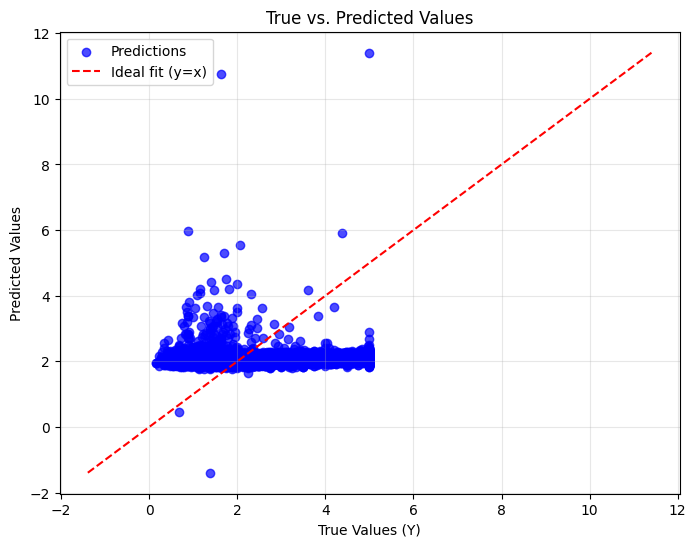

In [15]:
Y_train, y_train_predict

plt.figure(figsize=(8, 6))
plt.scatter(Y_train, y_train_predict, color='blue', alpha=0.7, label='Predictions')

# Add a reference line (y=x) for perfect predictions
min_val = min(min(Y_train), min(y_train_predict))
max_val = max(max(Y_train), max(y_train_predict))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal fit (y=x)')

# Plot aesthetics
plt.xlabel("True Values (Y)")
plt.ylabel("Predicted Values")
plt.title("True vs. Predicted Values")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
